# 🧠 Titanic Dataset - Exploratory Data Analysis

This notebook performs a detailed EDA on the Titanic dataset, exploring patterns and relationships in the data to inform model building.

In [14]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import preprocess
sns.set(style="whitegrid")

# 📁 Load Dataset
df = preprocess('titanic_data/train.csv')
df.head()

c:\Users\alpya\Documents\1.titanic-project\preprocess.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)
c:\Users\alpya\Documents\1.titanic-project\preprocess.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,2,3.62500,True,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,2,35.64165,False,False,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,1,7.92500,False,False,True,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,2,26.55000,False,False,True,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,1,8.05000,True,False,True,False,True,False,False


## 📊 Basic Info and Missing Values

In [15]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   FamilySize     891 non-null    int64  
 8   FarePerPerson  891 non-null    float64
 9   Sex_male       891 non-null    bool   
 10  Embarked_Q     891 non-null    bool   
 11  Embarked_S     891 non-null    bool   
 12  Title_Miss     891 non-null    bool   
 13  Title_Mr       891 non-null    bool   
 14  Title_Mrs      891 non-null    bool   
 15  Title_Rare     891 non-null    bool   
dtypes: bool(7), float64(3), int64(6)
memory usage: 68.9 KB


PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilySize       0
FarePerPerson    0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Rare       0
dtype: int64

## 🎯 Target Variable: `Survived`

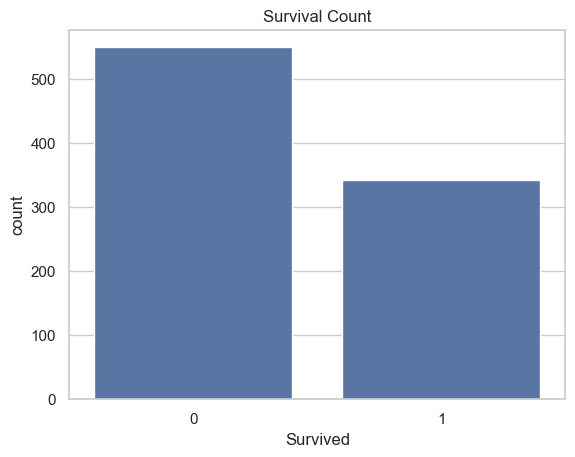

In [16]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

## 👩‍👦 Categorical Features vs Survived

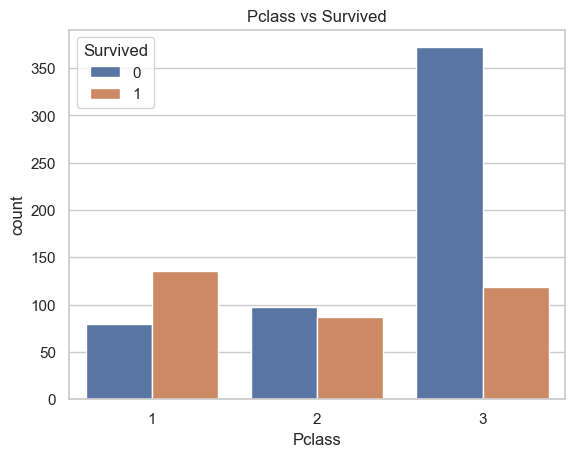

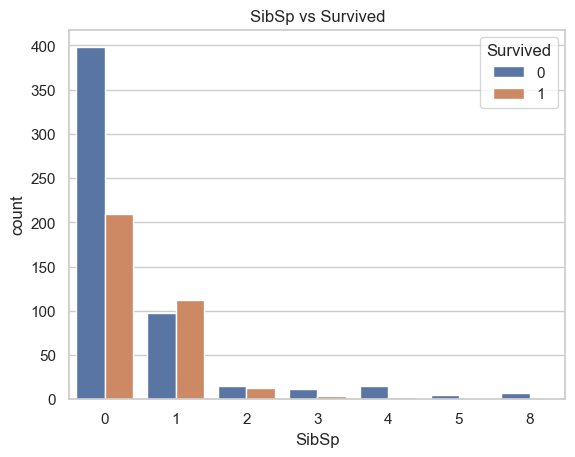

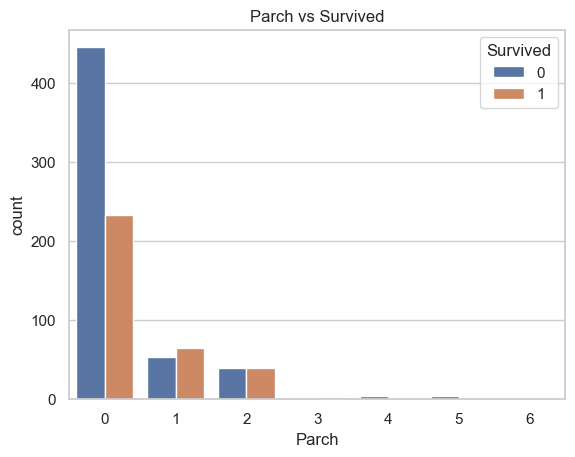

In [19]:
cat_features = ["Pclass", "SibSp", "Parch"]
for col in cat_features:
    sns.countplot(x=col, hue="Survived", data=df)
    plt.title(f"{col} vs Survived")
    plt.show()

## 📈 Numerical Feature Distributions

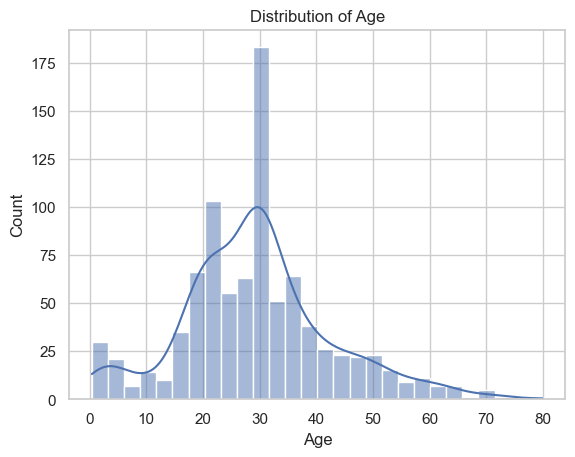

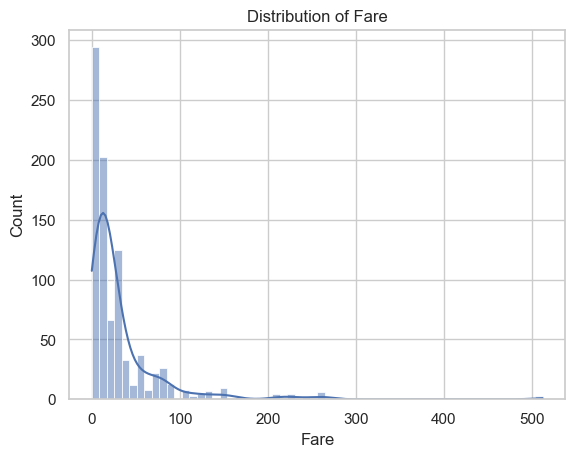

In [20]:
num_features = ["Age", "Fare"]
for col in num_features:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## 🔗 Feature Interactions

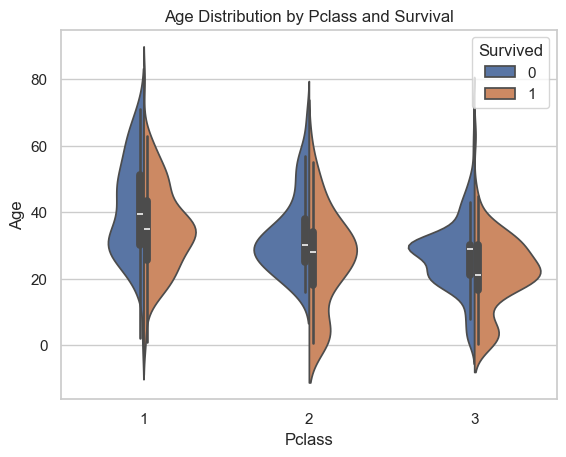

In [21]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)
plt.title("Age Distribution by Pclass and Survival")
plt.show()

## 📌 Correlation Heatmap

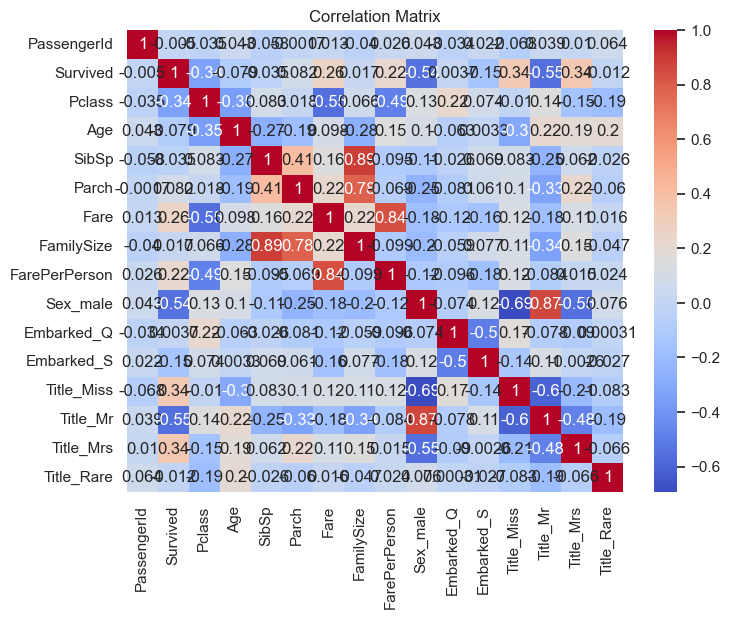

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()